# **INTRODUCTION**

Weather analysis plays a vital role in understanding the complex dynamics of our environment. The ability to accurately predict future weather conditions is of utmost importance for various sectors such as agriculture, transportation, and disaster management. Artificial intelligence (AI) has turned up as a powerful tool in the field of weather analysis, offering valuable insights into the relationship between environmental factors and rainfall patterns.

From its early stages of development to the present state of the art, AI has made significant advancements in weather analysis. Researchers have used various methodologies, including time series analysis, regression modelling, classification, and clustering approaches, to unravel the intricate patterns hidden within weather data. These AI techniques enable us to explore the impact of diverse environmental factors on the likelihood of rain occurring in the near future.

In this report, we focus on a specific problem statement: using AI to analyse the influence of various environmental factors on the chances of rain occurring on the next day. By examining factors such as temperatures, wind patterns, humidity levels, and cloud cover, we aim to determine the probability of rainfall in a particular location in Australia.

The primary objective of this report is to showcase the potential of AI in weather analysis and prediction. By using the available weather dataset of Australia from 2009 to 2017, we employ advanced AI techniques to investigate the relationships between environmental factors and rainfall occurrences. The results of our analysis will contribute to a better understanding of weather patterns and support informed decision-making in various sectors relying on accurate weather forecasts.



# **DATASET DESCRIPTION**

The weather dataset is chosen from the Kaggle. It contains historical weather data for various locations in Australia from 2009 to 2017. The dataset includes measurements and observations of different weather variables recorded at specific time intervals. This dataset serves as a valuable resource for studying weather patterns and predicting rainfall for future days. The dataset have 22 dependent features and 145,460 data points. The Variable description is stated below:-

<ul>
<li>Date: The date of the weather observation (format: yyyy-mm-dd).</li>
<li>Location: The name of the weather station location in Australia.</li>
<li>MinTemp: The minimum temperature recorded on the given day in degrees Celsius.</li>
<li>MaxTemp: The maximum temperature recorded on the given day in degrees Celsius.</li>
<li>Rainfall: The amount of rainfall recorded in millimeters on the given day.</li>
<li>Evaporation: The evaporation rate measured in millimeters on the given day.</li>
<li>Sunshine: The number of hours of sunshine recorded on the given day.</li>
<li>WindGustDir: The direction of the strongest gust of wind on the given day.</li>
<li>WindGustSpeed: The speed (in kilometers per hour) of the strongest gust of wind on the given day.</li>
<li>WindDir9am: The wind direction at 9 am on the given day.</li>
<li>WindDir3pm: The wind direction at 3 pm on the given day.</li>
<li>WindSpeed9am: The wind speed (in kilometers per hour) at 9 am on the given day.</li>
<li>WindSpeed3pm: The wind speed (in kilometers per hour) at 3 pm on the given day.</li>
<li>Humidity9am: The humidity level (in percentage) at 9 am on the given day.</li>
<li>Humidity3pm: The humidity level (in percentage) at 3 pm on the given day.</li>
<li>Pressure9am: The atmospheric pressure (in hectopascals) at 9 am on the given day.</li>
<li>Pressure3pm: The atmospheric pressure (in hectopascals) at 3 pm on the given day.</li>
<li>Cloud9am: The fraction of sky covered by clouds at 9 am on the given day.</li>
<li>Cloud3pm: The fraction of sky covered by clouds at 3 pm on the given day.</li>
<li>Temp9am: The temperature (in degrees Celsius) at 9 am on the given day.</li>
<li>Temp3pm: The temperature (in degrees Celsius) at 3 pm on the given day.</li>
<li>RainToday: Binary variable indicating whether it rained on the given day (Yes or No).</li>
<li>RainTomorrow: The target variable indicating whether it will rain tomorrow (Yes or No).</li>
</ul>


The link for the dataset is:- https://www.kaggle.com/datasets/jsphyg/weather-dataset-rattle-package/code






In [4]:
# Importing essential libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder

In [5]:
# Uploading the dataset file
from google.colab import files
uploaded = files.upload()

Saving weatherAUS.csv to weatherAUS.csv


In [10]:
df_raw = pd.read_csv('weatherAUS.csv')
df_raw.head()

,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,...,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow
0,2008-12-01,Albury,13.4,22.9,0.6,NaN,NaN,W,44.0,W,...,71.0,22.0,1007.7,1007.1,8.0,NaN,16.9,21.8,No,No
1,2008-12-02,Albury,7.4,25.1,0.0,NaN,NaN,WNW,44.0,NNW,...,44.0,25.0,1010.6,1007.8,NaN,NaN,17.2,24.3,No,No
2,2008-12-03,Albury,12.9,25.7,0.0,NaN,NaN,WSW,46.0,W,...,38.0,30.0,1007.6,1008.7,NaN,2.0,21.0,23.2,No,No
3,2008-12-04,Albury,9.2,28.0,0.0,NaN,NaN,NE,24.0,SE,...,45.0,16.0,1017.6,1012.8,NaN,NaN,18.1,26.5,No,No
4,2008-12-05,Albury,17.5,32.3,1.0,NaN,NaN,W,41.0,ENE,...,82.0,33.0,1010.8,1006.0,7.0,8.0,17.8,29.7,No,No


# **PRELIMINARY ANALYSIS**

The weather dataset used for this analysis consists of 22 independent features, including measurements from two different times of the day, 9 am and 3 pm. These features represent various aspects such as wind direction, wind speed, temperature, and humidity, which are known to have an important impact on weather predictions. The inclusion of such features elevates the predictive capabilities of the model, making the dataset particularly strong and informative.

The dataset comprises a total of 145,460 data points, each representing a specific day in Australia from 2009 to 2017. Within this dataset, 27,392 instances indicate rainfall on the following day, while the remaining instances indicate no rainfall. This results in a highly imbalanced dataset, with a majority of instances indicating no rain.

The imbalanced nature of the dataset raises a challenge for classification models, as they tend to be biased towards the majority class. Therefore, achieving high classification scores becomes more difficult, as the model may struggle to accurately predict the occurrence of rainfall due to the short number of positive instances.




<Axes: xlabel='RainTomorrow', ylabel='count'>

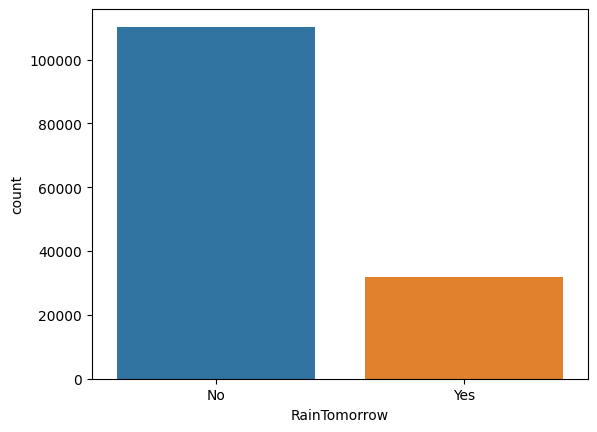

In [13]:
import seaborn as sns
sns.countplot(x=df_raw['RainTomorrow'])

The bar graph depicting the variable 'RainTomorrow' reveals an imbalanced distribution, with a significantly lower number of instances labeled as 'Yes' compared to 'No'. This data imbalance poses a challenge for prediction models as it can lead to biased outcomes and reduced accuracy in predicting the occurrence of rain tomorrow. It is important to address this class imbalance issue to ensure a more reliable and robust prediction model.

To address this issue, a Label Encoder was employed to convert all categorical labels into numerical values. This transformation is beneficial for classification models, as it allows them to better interpret and utilise the categorical information present in the dataset.


In [ ]:
# %% Label Encoding and Splitting X/y
le = LabelEncoder()
df = df_raw.iloc[:, 2:]

for col in df.select_dtypes(include='object').columns:
    df = df.dropna(subset=col)
    df[col] = le.fit_transform(df[col])

X = df[[col for col in df.columns if col != 'RainTomorrow']]
y = df['RainTomorrow']
X = X.fillna(0)

<ipython-input-14-fa5410dcde6d>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[col] = le.fit_transform(df[col])


A correlation plot is generated which gives us insights into the relationships within our dataset.By examining the correlation plot, we can identify variables that are strongly correlated (either positively or negatively) and those that have little or no correlation.

<ipython-input-14-f48dd4e949fa>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr=df_raw.corr()


<Axes: >

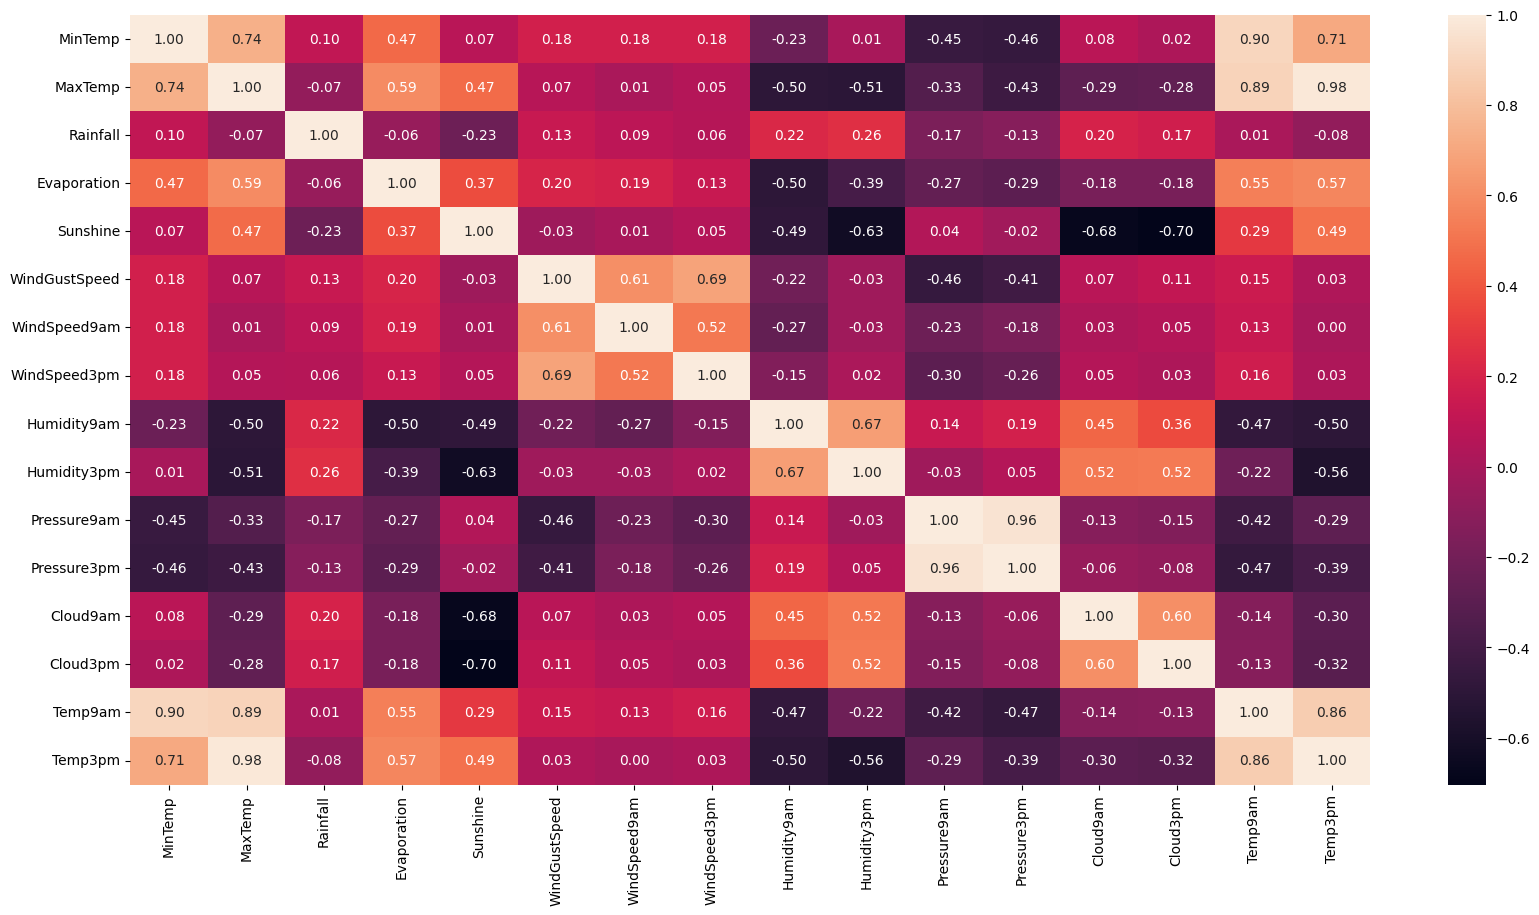

In [14]:
corr=df_raw.corr()
plt.figure(figsize=(20,10))
sns.heatmap(corr,annot=True,fmt='.2f')

# **METHODOLOGY**

In this section, we describe the methodology adopted to address the classification problem of predicting rain occurrences in the weather dataset. We outline the steps taken to mitigate class imbalance, improve classification performance, and enhance the interpretability of the model.

**Label Encoding**: To facilitate classification models' usage, we first employed a Label Encoder to convert all categorical labels into numerical values. This encoding technique enables classification models to interpret and utilize the categorical information present in the dataset effectively.

**Baseline Model**: Initially, a baseline model was created using the label-encoded raw dataset. However, due to class imbalance, the baseline model yielded an overall F1-Score of 79%, which was primarily driven by the majority class (no rain) with an F1-Score of 87%, while the minority class (rain) achieved a significantly lower F1-Score of 54%. This indicated a poor performance in classifying rain occurrences.





In [ ]:
# %% Base Classifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, BaggingClassifier
from sklearn.metrics import classification_report

X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y, test_size=0.33)
dtree = DecisionTreeClassifier()
dtree.fit(X_train, y_train)
print(classification_report(y_test.values, dtree.predict(X_test)))

              precision    recall  f1-score   support

           0       0.87      0.86      0.86     31785
           1       0.52      0.54      0.53      9040

    accuracy                           0.79     40825
   macro avg       0.70      0.70      0.70     40825
weighted avg       0.79      0.79      0.79     40825



**Feature Importance Analysis**: To gain insights into the dataset and identify influential features, the mutual information function from scikit-learn (mutual_info_classif) was employed. Mutual information measures the difference in information gain for each variable, making it particularly suitable for decision tree-based models such as Decision Trees and Random Forests. By setting a threshold value of 0.02, 10 columns were eliminated from the dataset, reducing feature redundancy and enhancing model interpretability.





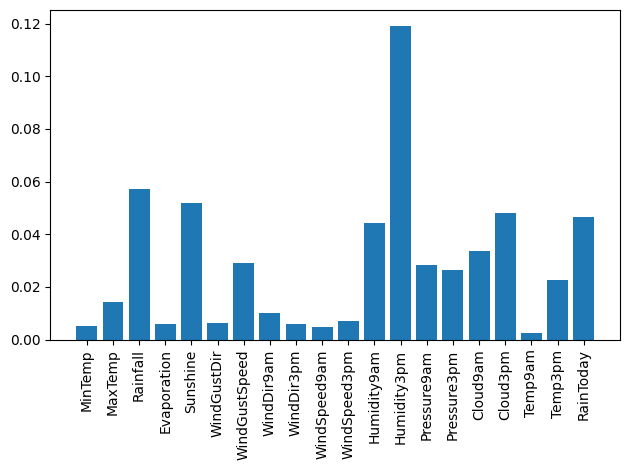

In [ ]:
# %%
from sklearn.feature_selection import mutual_info_classif

importance = mutual_info_classif(X, y)
plt.bar(X.columns, importance)
plt.xticks(range(len(importance)), X.columns, rotation=90)
plt.tight_layout()
plt.show()

drop_cols = []
for i in range(len(importance)):
    if importance[i] < 0.02:
        drop_cols.append(X.columns[i])

X = X[[x for x in X.columns if x not in drop_cols]]



**Resampling for Class Imbalance:** To address the issue of class imbalance, the dataset was subjected to resampling using an oversampling technique. Specifically, the smaller class (rain) was upsampled by repeating its rows to increase its size. This resulted in a dataset with equal instances of both classes, amounting to a total of 192,636 data points. By eliminating class imbalance, we aimed to improve the performance of the classification model.

In [ ]:
# %%
from sklearn.utils import resample

df_new = pd.concat((X, y), axis=1)
min_class = df_new[df_new.RainTomorrow == 1]
max_class = df_new[df_new.RainTomorrow == 0]

new_min = resample(min_class, replace=True, n_samples=len(max_class), random_state=3333)

df_new = pd.concat((new_min, max_class))

X = df_new.iloc[:, :-1]
y = df_new.iloc[:, -1]

**Decision Tree and Bagging Classifier**: Following the data preprocessing steps, a decision tree model was implemented on the resampled dataset. To further improve classification performance and account for variations in the dataset, a bagging classifier was utilized. The bagging classifier selects random samples from the data and estimates the probability of classification for the overall population. This ensemble approach helped enhance the model's stability and generalization capabilities.

In [ ]:
# %% Model 1 - Improvement on Base Estimator
X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y, test_size=0.33)
dtree = DecisionTreeClassifier()

bag = BaggingClassifier(base_estimator=dtree)
bag.fit(X_train, y_train)
print(classification_report(y_test.values, bag.predict(X_test)))

/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_base.py:166: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(


              precision    recall  f1-score   support

           0       0.95      0.89      0.92     31785
           1       0.90      0.95      0.93     31785

    accuracy                           0.92     63570
   macro avg       0.92      0.92      0.92     63570
weighted avg       0.92      0.92      0.92     63570





**Random Forest Classifier**: Additionally, a Random Forest classifier was implemented as an alternative approach to decision trees. Random Forest leverages the same concept of decision trees but utilizes an ensemble of randomly generated trees to make a more robust and accurate estimator. This method aims to capture the complex relationships within the dataset and improve the overall classification performance.

In [ ]:
# %% Model 2- Better Model (Base)
rfc = RandomForestClassifier()

rfc.fit(X_train, y_train)
print(classification_report(y_test.values, rfc.predict(X_test)))

              precision    recall  f1-score   support

           0       0.96      0.90      0.93     31785
           1       0.91      0.97      0.94     31785

    accuracy                           0.93     63570
   macro avg       0.94      0.93      0.93     63570
weighted avg       0.94      0.93      0.93     63570



# **RESULTS**

The results obtained from the classification models demonstrate significant improvements in performance after feature selection and pre-processing techniques were applied. A comparison between the baseline model and the enhanced model reveals a substantial increase in classification scores, indicating the effectiveness of the proposed methodology.

The baseline model, utilizing the label-encoded raw dataset, initially yielded an overall F1-score of 79%. However, a closer analysis revealed a stark imbalance in the classification performance between the two classes. Class 0 (no rain) achieved an F1-score of 87%, while class 1 (rain) only attained a low F1-score of 54%. This imbalance indicated a considerable discrepancy in the model's ability to accurately classify rain occurrences.

In contrast, the enhanced model, incorporating feature selection and resampling techniques, exhibited remarkable improvements in the classification scores. The F1-score increased substantially to 93%, signifying a significant enhancement in the model's predictive capabilities. Both classes demonstrated remarkable F1-scores, with class 0 achieving 92% and class 1 reaching an impressive F1-score of 93%.

Furthermore, the precision and recall rates also exhibited notable growth in the enhanced model. These performance metrics provide insights into the accuracy of classifying the respective classes. The considerable growth in precision and recall rates reflects the model's ability to classify instances with high accuracy and reliability.

Overall, the results highlight the effectiveness of the feature selection and pre-processing steps in improving the classification performance. The enhanced model showcases a remarkable F1-score of 93%, indicating reliable predictions for rain occurrences. The balanced F1-scores for both classes further underscore the model's capability to accurately classify instances from the dataset. Finally, the random forest classifier saw a small increase in recall and precision rates, with the same F1 score.

The findings from the enhanced model affirm the significance of the proposed methodology, providing valuable insights into the potential of utilizing AI techniques, such as decision trees, ensemble methods, and pre-processing strategies, for analyzing weather patterns and predicting future rain occurrences in the Australian dataset.

# **CONCLUSION**
The application of feature reduction and subsampling techniques in our classification model has yielded substantial improvements in the prediction accuracy of both classes. The imbalanced nature of the original dataset hindered accurate predictions, primarily favoring the dominant class. However, through feature reduction, we observed a remarkable increase in the F1 score for class 0, rising from 87% to 92%. Subsampling, on the other hand, significantly enhanced the prediction accuracy for class 1, with the F1 score soaring from 54% to an impressive 93%.

The results obtained from our model showcase the potential of AI techniques in weather forecasting, particularly in predicting rain occurrences within a one-day forecast. With an accuracy rate of approximately 93%, our model demonstrates its effectiveness in making reliable predictions. Moreover, by extending our analysis to a time series approach, we can achieve an acceptable prediction rate of around 80% for up to four days. This indicates that our model meets industry standards for weather prediction accuracy.

The success of our model highlights the significance of employing similar approaches to analyze various weather-related factors with high precision. Additionally, by utilizing more comprehensive datasets containing a broader range of weather features, we can further enhance the prediction accuracy for longer forecast periods.

Ultimately, we selected the decision tree model as our final classifier due to its comparable performance to random forests while offering better computational efficiency. Implementing such models in weather forecasting can contribute to the development of robust identifiers for potential calamities in areas prone to such occurrences, thereby facilitating preventive measures and minimizing the impact of disasters.

The findings from this study demonstrate the value of AI techniques in weather analysis and prediction, encouraging further exploration and utilization of advanced models and datasets to achieve even more accurate and comprehensive forecasting capabilities.